<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/Univariate_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Get the stock quote DX-Y.NYB
df = web.DataReader('DX-Y.NYB', data_source='yahoo', start='1990-01-01', end='2020-01-01')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998
...,...,...,...,...,...,...
2019-12-23,97.820000,97.580002,97.669998,97.680000,0.0,97.680000
2019-12-26,97.709999,97.489998,97.629997,97.589996,0.0,97.589996
2019-12-27,97.550003,96.919998,97.540001,96.919998,0.0,96.919998


In [3]:
df1 = df['Close']
df1

Date
1990-01-01    93.209999
1990-01-02    94.290001
1990-01-03    94.419998
1990-01-04    92.519997
1990-01-05    92.849998
                ...    
2019-12-23    97.680000
2019-12-26    97.589996
2019-12-27    96.919998
2019-12-30    96.739998
2019-12-31    96.389999
Name: Close, Length: 7636, dtype: float64

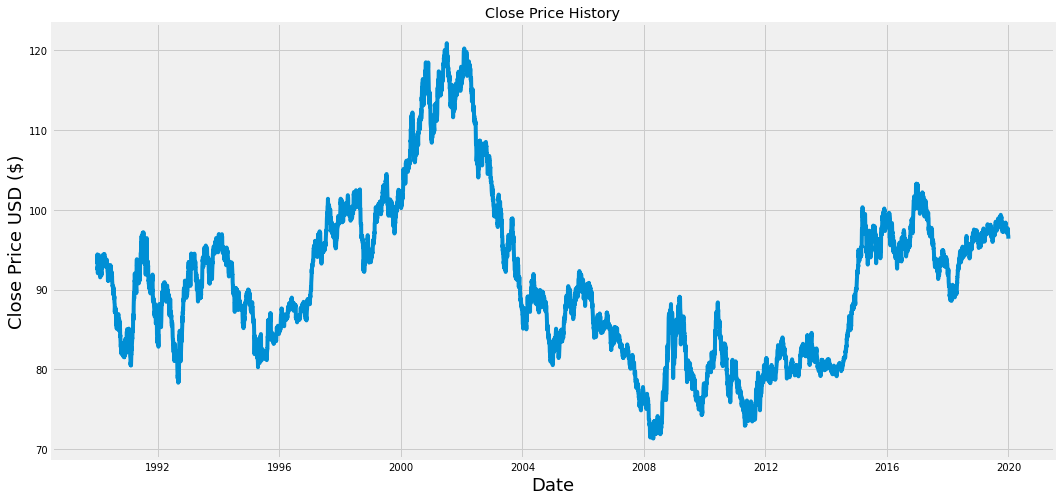

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Time Series has basically 3 components consisting of Trend, Seasonality, Irregularity, Cyclicity.

**Trend** –  Trend is the overall increase or decrease or constant variation in the value of the collected data over a period of time. It can persist for a long time as well as for a short duration at least a few days. For example. On festive seasons there is an increase in sales for a product, Population growth, etc.

**Seasonality** – Seasonality as the name suggests, shows a regular pattern in a quantity over an interval of time like sales of cold drinks increase in the summer every year. This is influenced by Seasonal, cultural, business factors, etc. The duration between the two cycles is short.

**Irregularity/ Residuals** – It is Random Component and does not follow a specific pattern. It can consist of both Trends, Seasonality with some Random fluctuations.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


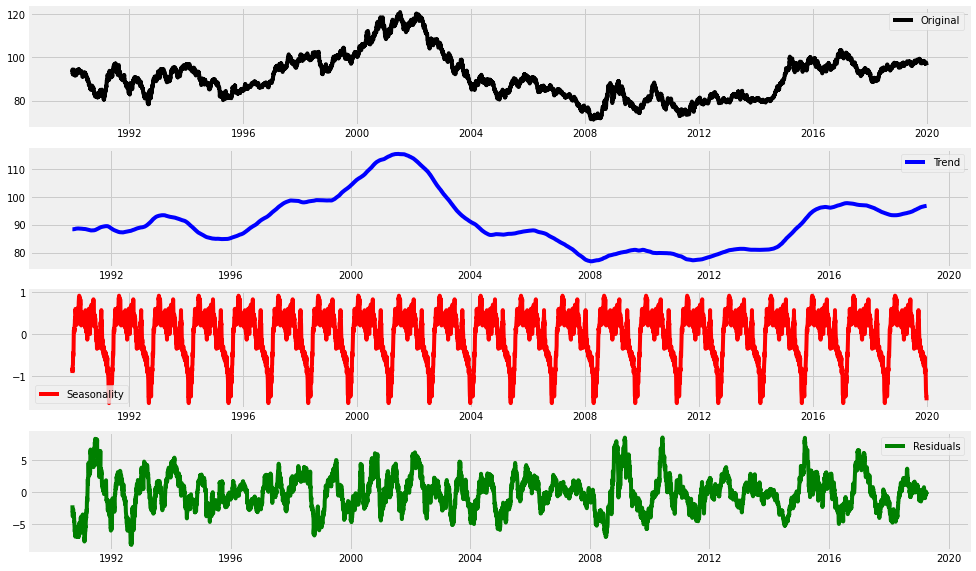

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = df1
decomp = seasonal_decompose(x=data, model='additive', freq = 365)
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(data, label='Original',color='black')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

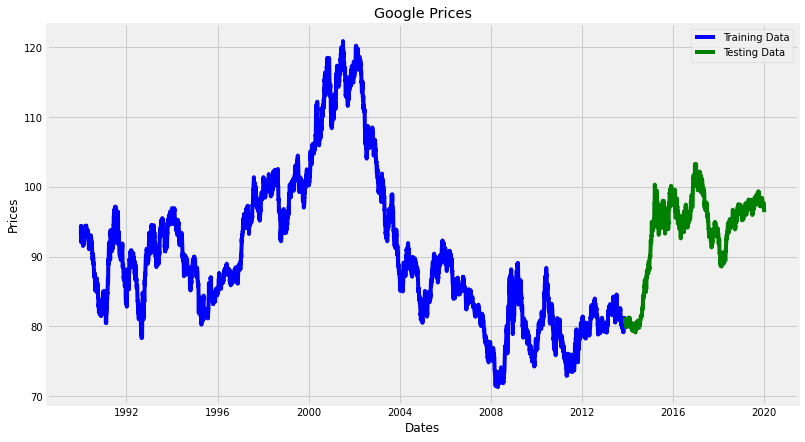

In [6]:
train_data= df1[0:int(len(df1)*0.8)]
test_data = df1[int(len(df1)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')

plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

since the data has multiplicative seasonality we apply a log filter and then analyze the residuals with autocorrelation plots.

In [7]:
train_data = np.log(train_data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


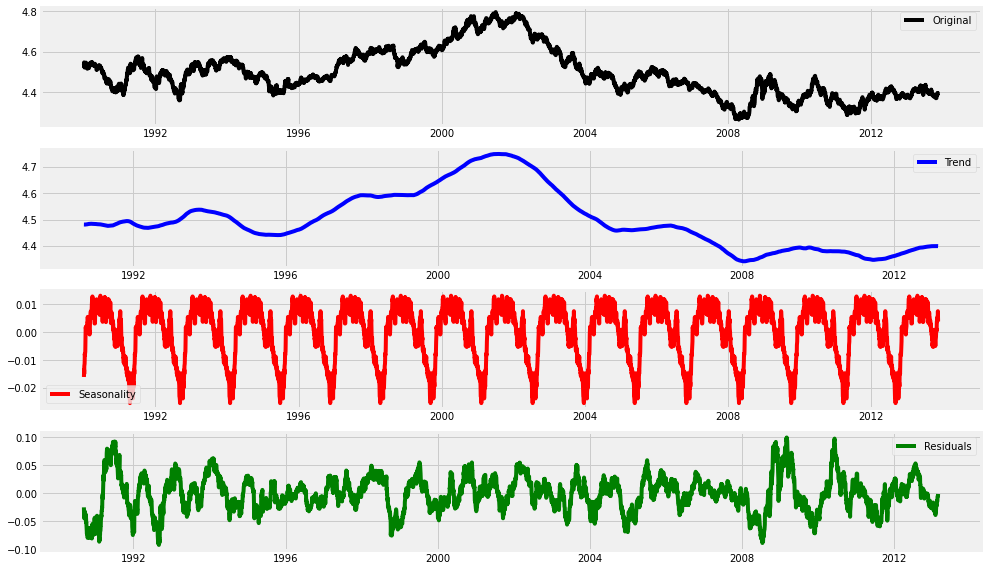

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = train_data
decomp = seasonal_decompose(x=data, model='additive', freq = 365)
est_trend = decomp.trend
est_seasonal = decomp.seasonal
est_residual = decomp.resid

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0].plot(data, label='Original',color='black')
axes[0].legend()
axes[1].plot(est_trend, label='Trend',color="b")
axes[1].legend()
axes[2].plot(est_seasonal, label='Seasonality',color='r')
axes[2].legend()
axes[3].plot(est_residual, label='Residuals',color='g')
axes[3].legend()

**Augmented Dickey-Fuller(ADF) Test**

ADF  test is a statistical test and these types of tests can provide confirmatory evidence that your time series is stationary or non-stationary. ADF test checks for stationarity by using a hypothesis. We may wither accept or reject this hypothesis.

Null Hypothesis – The null hypothesis is accepted and it suggests that the time series is non-stationary.
Alternate Hypothesis: The null hypothesis is rejected and it suggests the time series is stationary.
To know whether we have to accept or reject a null hypothesis demands a threshold to be set which is set upon the p-value of the ADF Test. Generally, the threshold value is 5%.

P-Value < 0.05 – Null hypothesis rejected and Time-Series is Stationary.

P-Value > 0.05 – Null hypothesis accepted and Time Series is Non- Stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(train_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -1.696009
p-value                           0.433170
#Lags Used                        0.000000
Number of Observations Used    6107.000000
Critical Value (1%)              -3.431421
Critical Value (5%)              -2.862013
Critical Value (10%)             -2.567022
dtype: float64


Applying time shifting, we subtract every the point by the one that preceded it to make data stationary

4 years = 3 seasonality

1 year = 0.75 seasonality

0.75 is 3/4 of year
so 9 months seasonality

12 months = 365 days

9 months = 273 days

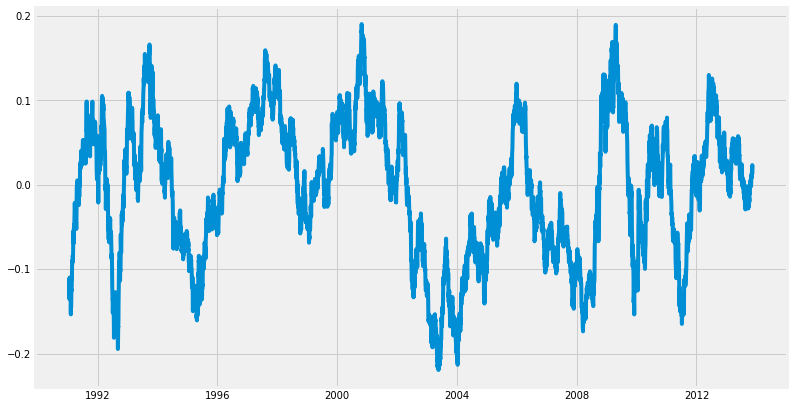

In [25]:
  df2 = train_data - train_data.shift(273)
  df2.dropna(inplace=True)
  plt.figure(figsize=(12,7))
  plt.plot(df2)
  #df2.index = pd.DatetimeIndex(df2.index).to_period('D')
  df1_stationary = df2
  

In [26]:
df1_stationary

Date
1991-01-17   -0.111566
1991-01-18   -0.130310
1991-01-21   -0.135561
1991-01-22   -0.111118
1991-01-23   -0.121587
                ...   
2013-11-08    0.015387
2013-11-11    0.021691
2013-11-12    0.023050
2013-11-13    0.017325
2013-11-14    0.012801
Name: Close, Length: 5835, dtype: float64

In [27]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1_stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.671776
p-value                           0.004528
#Lags Used                        4.000000
Number of Observations Used    5830.000000
Critical Value (1%)              -3.431472
Critical Value (5%)              -2.862036
Critical Value (10%)             -2.567034
dtype: float64


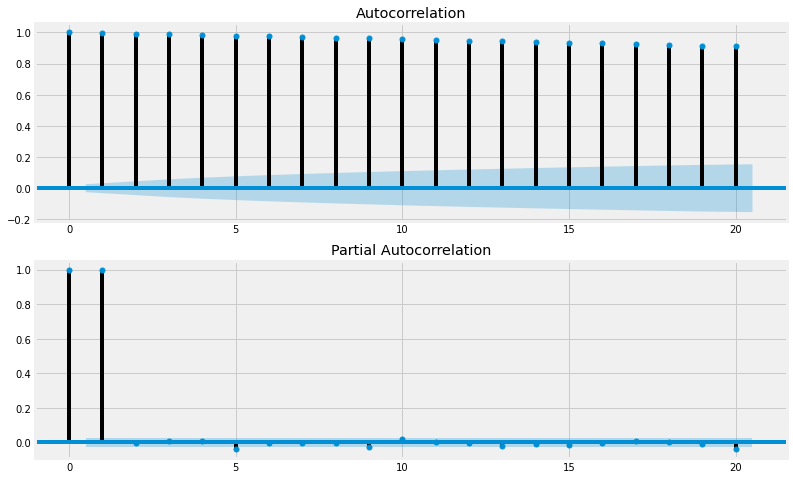

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import statsmodels.api as sm
%matplotlib inline

#autocorrelation_plot(df1_stationary)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1_stationary, lags = 20, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1_stationary, lags = 20, ax = ax2)
#pyplot.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


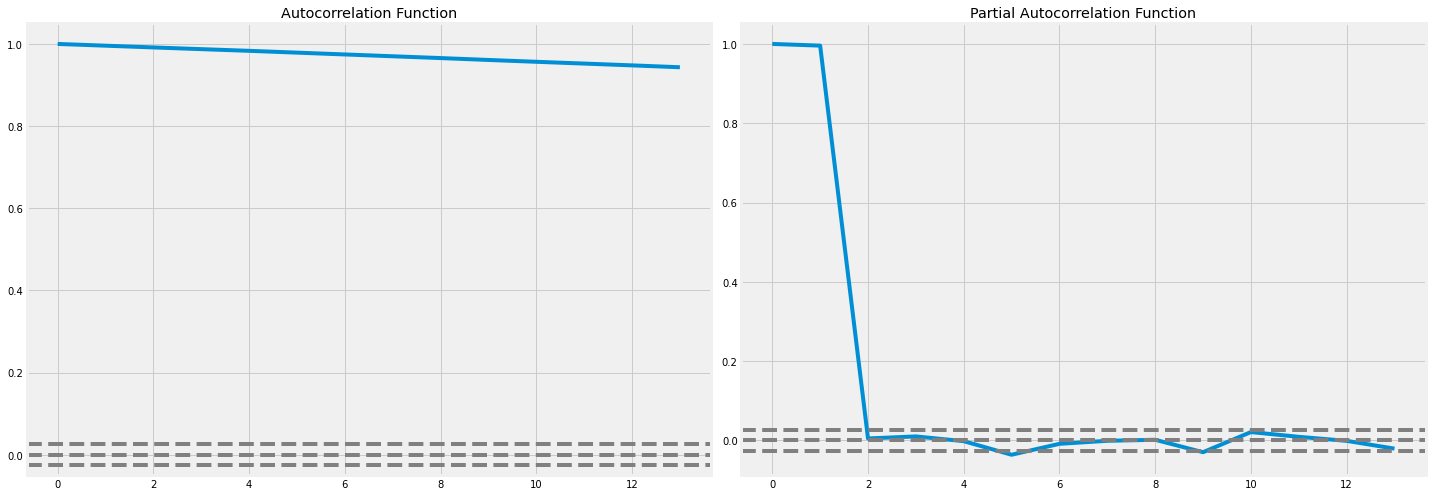

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
plt.figure(figsize=(20,7))
lag_acf = acf(df1_stationary, nlags=13)
lag_pacf = pacf(df1_stationary, nlags=13, method='ols')

#Plot ACF: To calculate value of p
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: To calculate value of q
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df1_stationary)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

AR -> acf = q = 1

MA -> pacf = p = 2

ARIMA stands for  Auto-Regressive Integrated Moving Average. This model can be fitted to time series data in order to forecast or predict future data in the time- series. This model can also be used even if the time series is not stationary.

ARIMA model has 3 main parameters p, d, and q and that’s why this model can also be defined with the notation ARIMA(p, d, q). Let us see what these parameters are-

p – It denotes the number of AutoRegressive(AR) terms in the time series.
AutoRegression – It is a model that uses the dependent relationship between an observation and some number of lagged observations i.e the relationship between a value of a quantity collected at a time and the value of the same quantity collected at any regular interval in the past.

d – It denotes the order of difference needed for stationarity and it is the Integrated(I) part of ARIMA. We have to get understandings of the plots and other statistics to find the right order of difference. To learn more about finding the right order of difference for your model, you can refer here.

q – It denotes the order of Moving Average(MA) or the number of lagged forecast errors in the prediction equation.
Moving Average(MA) – It is defined as taking averages or changing data in small portions whose size is defined as the size of the window. This window size is taken and averages are counted by moving this window one step at a time.

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df1_stationary, order=(1,1,1), seasonal_order=(1,1,1,15))  
model_fit = model.fit()  
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parame

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 5835
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 15)   Log Likelihood               20204.266
Date:                            Fri, 03 Jul 2020   AIC                         -40398.531
Time:                                    16:10:15   BIC                         -40365.187
Sample:                                         0   HQIC                        -40386.934
                                           - 5835                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1583      2.190     -0.072      0.942      -4.450       4.134
ma.L1          0.1529      2.191   

In [31]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# invert the differenced forecast to something usable
forecast = model_fit.predict(start = len(train_data)+1, end=len(train_data)+len(test_data))
history = [x for x in train_data]
pred = []
days_in_year = 273
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	pred.append(inverted)
	history.append(inverted)
	day += 1

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
pred = np.exp(pred)
output = pd.DataFrame(columns=['test','pred'])
output['test'] = test_data
output['pred'] = pred

output

,test,pred
Date,,
2013-11-15,80.839996,84.575237
2013-11-18,80.830002,84.638031
2013-11-19,80.699997,84.558610
2013-11-20,81.110001,84.206994
2013-11-21,81.050003,84.463301
...,...,...
2019-12-23,97.680000,97.855564
2019-12-26,97.589996,97.800575
2019-12-27,96.919998,97.217630


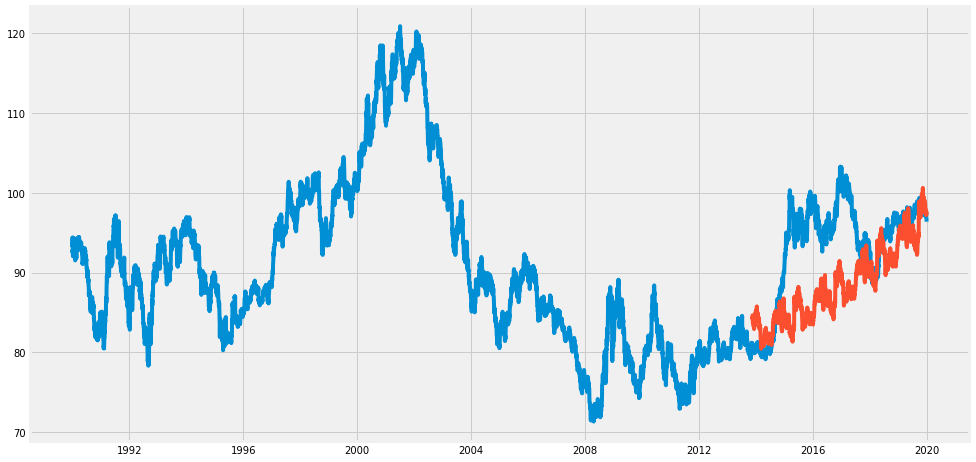

In [33]:
plt.figure(figsize=(15,8))
plt.plot(df1)
plt.plot(output['pred'])

plt.show()

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(test_data, pred))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(test_data, pred)
print('Mean Absolute Error: %.3f'% mae)

Root Mean Squared Error: 7.572
Mean Absolute Error: 5.922


In [35]:
mape = np.mean(np.abs(pred - test_data)/np.abs(test_data))
print('Mean Absolute Percentage Error: %.3f'% mape)

Mean Absolute Percentage Error: 0.062


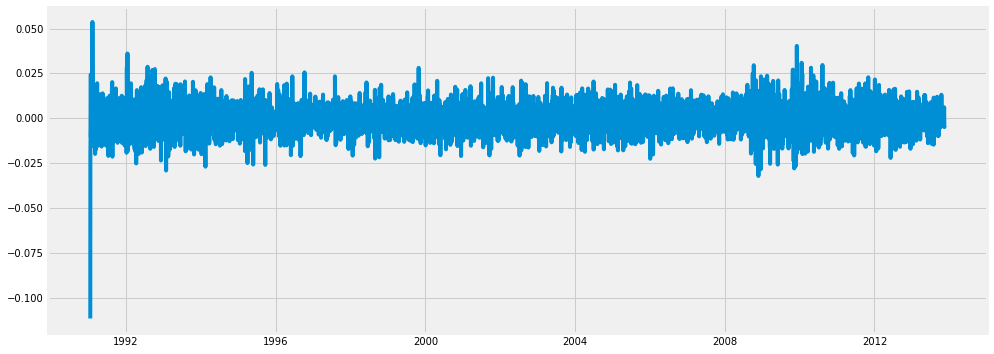

In [36]:
res = model_fit.resid
res = pd.Series(res)
plt.figure(figsize=(15,6))
plt.plot(res)

In [37]:
print(res.describe())

count    5835.000000
mean       -0.000083
std         0.007710
min        -0.111566
25%        -0.004825
50%        -0.000113
75%         0.004625
max         0.053666
dtype: float64


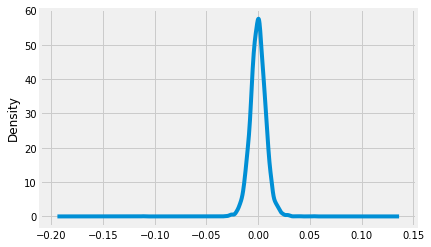

In [38]:
res.plot(kind='kde')
plt.show()

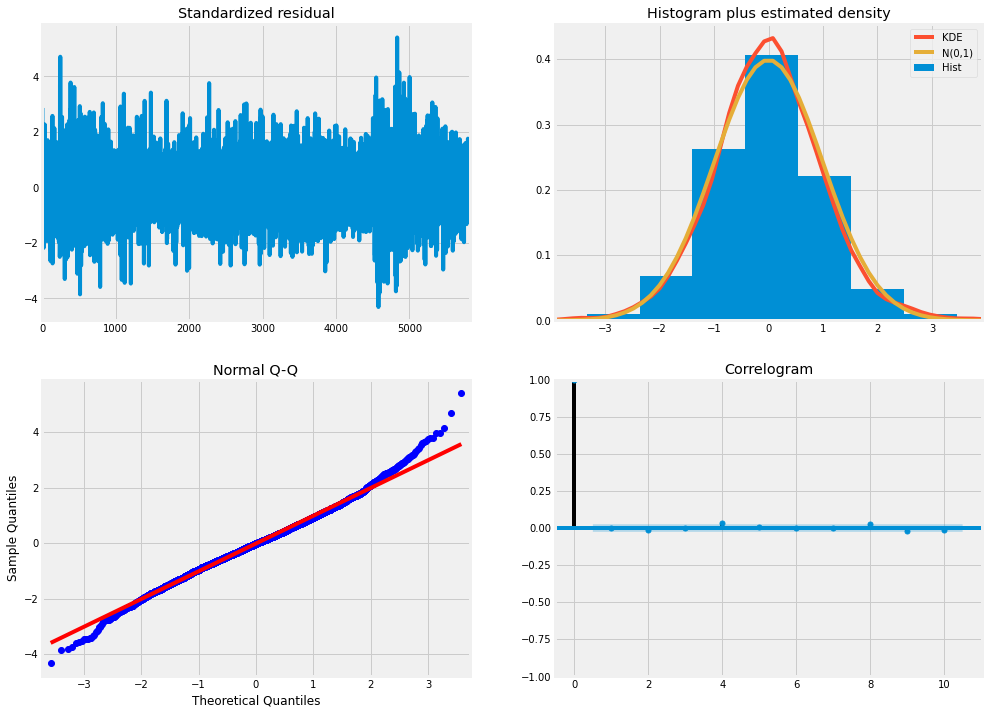

In [39]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()